# Ride Sharing Data Plotting
### Jackie McGuire 
** Observable trends: 
1. As trip number and city size increase, average fare decreases.
2. Several outliers exist where fare amount is significantly larger than expected.
3. Urban drivers make more trips than their counterparts, but earn lower fares

** Limitations:
1. Data does not include information on trip length, in time or miles. 
2. Data does not account for demand-based pricing changes.


In [21]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

In [22]:
# Get city data from CSVs
cityfilename = os.path.join("raw_data", 'city_data.csv')
ridefilename = os.path.join("raw_data", 'ride_data.csv')
#convert city data to dataframes and check output
city_df = pd.read_csv(cityfilename)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [23]:
# Repeat for ride data
ride_df = pd.read_csv(ridefilename)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [24]:
# Merge dataframes and check output - note that value for driver_count is repeated 
merged_df=pd.merge(city_df, ride_df, on="city", how="left")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [25]:
average_fare = merged_df.groupby("city").fare.mean()
average_fare=pd.DataFrame(average_fare)
total_drivers = merged_df.groupby("city").driver_count.mean()
total_drivers=pd.DataFrame(total_drivers)
rides_total = merged_df.groupby("city").ride_id.count()
rides_total=pd.DataFrame(rides_total)
city_type = merged_df.groupby("city").type.value_counts()
city_type=pd.DataFrame(city_type)
total_fares = merged_df.groupby("city").fare.sum()
total_fares = pd.DataFrame(total_fares)
total_fares=total_fares.rename(columns={"fare": "total_fares"})

In [26]:
city_summary_df = total_drivers.join(average_fare, how='outer')
city_summary_df = city_summary_df.join(rides_total, how='outer')
city_summary_df = city_summary_df.join(city_type, how='outer')
city_summary_df=city_summary_df.merge(total_fares, how='outer', right_index=True, left_index=True)
city_summary_df=city_summary_df.drop("type", axis=1)
city_summary_df=city_summary_df.rename(columns={"ride_id": "total_rides", "fare": "average_fare"})
city_summary_df = city_summary_df.reset_index()
city_summary_df=city_summary_df.round(decimals=2)
city_summary_df.head()

,city,type,driver_count,average_fare,total_rides,total_fares
0,Alvarezhaven,Urban,21,23.93,31,741.79
1,Alyssaberg,Urban,67,20.61,26,535.85
2,Anitamouth,Suburban,16,37.32,9,335.84
3,Antoniomouth,Urban,21,23.62,22,519.75
4,Aprilchester,Urban,49,21.98,19,417.65


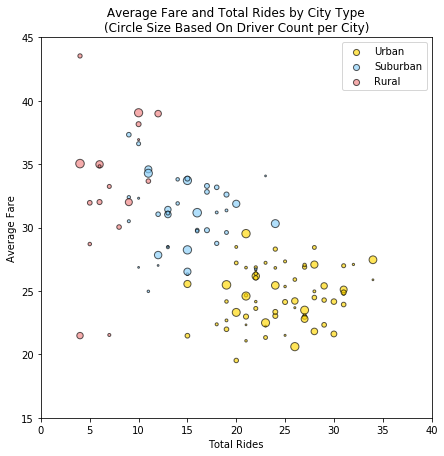

In [27]:
colors = ['Gold', 'Lightskyblue', 'Lightcoral']
citytypes = ['Urban', 'Suburban','Rural']
scatterfig=plt.figure(figsize = (7,7))
def scatterplot(citytype, facecolor):
    plt.scatter(city_summary_df['total_rides'][(city_summary_df["type"]==citytype)],city_summary_df['average_fare'][(city_summary_df["type"]==citytype)], marker="o", 
            facecolors=facecolor, edgecolors="black",
            sizes=city_summary_df['driver_count'], alpha=0.65, linewidths=1, label=citytypes)
for i, j in zip(citytypes, colors):
    scatterplot(i, j)
plt.title(" Average Fare and Total Rides by City Type \n(Circle Size Based On Driver Count per City)")
plt.xlim(0,40)
plt.xlabel("Total Rides")
plt.ylabel("Average Fare")
plt.ylim(15,45)
plt.legend(citytypes)
plt.show()

In [28]:
city_pivot = city_summary_df.pivot_table(index="type", aggfunc='sum')
city_pivot=city_pivot.reset_index()
city_pivot

,type,average_fare,driver_count,total_fares,total_rides
0,Rural,615.72,104,4255.09,125
1,Suburban,1268.64,629,20335.69,657
2,Urban,1623.89,2607,40078.34,1625


In [29]:
# Create function for pie chart
def piechart(key, title):
    explode=[0.05,0.05, 0.05]
    plt.pie(city_pivot[key], explode=explode, colors=colors, labels=city_pivot["type"], autopct='%.2f%%', shadow=True)
    plt.title("Percent of "+title+  " by City Type")
    legend = ['Rural', 'Suburban', 'Urban']
    plt.legend(legend)
    plt.show()

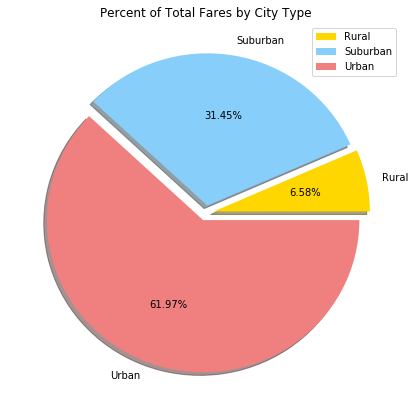

In [30]:
# Store figure for print and save, call function for total fares
piefig1 = plt.figure(figsize=(7,7))
piechart("total_fares", "Total Fares")

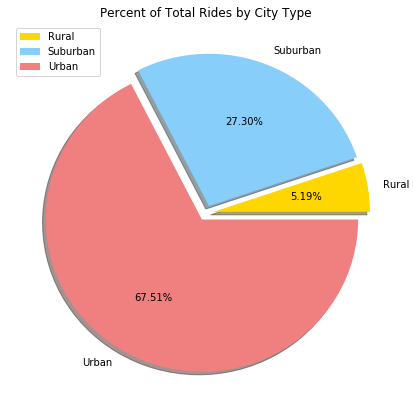

In [31]:
# Store figure for print and save, call function for total rides
piefig2 = plt.figure(figsize=(7,7))
piechart("total_rides", "Total Rides")

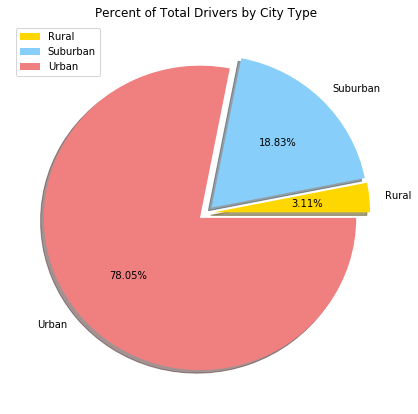

In [32]:
# Store figure for print and save, call function for total drivers
piefig3 = plt.figure(figsize=(7,7))
piechart("driver_count", "Total Drivers")

In [33]:
#Save Figures to PNG
scatterfig.savefig('faresandrides.png')
piefig1.savefig('totalfaresbycitytypepie.png')
piefig2.savefig('totalridesbycitytypepie.png')
piefig3.savefig('totaldriversbycitytypepie.png')
# Set output file for PDF
outputfile = 'pyber.pdf'
# Save files to PDF
with PdfPages(outputfile) as pdf:             
    pdf.savefig(scatterfig)
    pdf.savefig(piefig1)
    pdf.savefig(piefig2)
    pdf.savefig(piefig3)